## 1. Introduction to Baby Names Data
<blockquote>
  <p>What’s in a name? That which we call a rose, By any other name would smell as sweet.</p>
</blockquote>
<p>In this project, we will explore a rich dataset of first names of babies born in the US, that spans a period of more than 100 years! This suprisingly simple dataset can help us uncover so many interesting stories, and that is exactly what we are going to be doing. </p>
<p>Let us start by reading the data.</p>

In [73]:

# Import modules
import pandas as pd

# Read names into a dataframe: bnames
df = pd.read_csv('datasets/names.csv.gz')
bnames = pd.DataFrame(df)
print(bnames.head())

        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880


## 2. Exploring Trends in Names
<p>One of the first things we want to do is to understand naming trends. Let us start by figuring out the top five most popular male and female names for this decade (born 2011 and later). Do you want to make any guesses? Go on, be a sport!!</p>

In [75]:
# bnames_top5: A dataframe with top 5 popular male and female names for the decade
bnames_decade= bnames[bnames['year'] >=2011]
#bnames_top5 = bnames_decade.groupby(['sex','name']).sum().sortlevel(level= ['sex'], ascending=[True]).filter(items=['sex','name','births'])
bnames_top5 = bnames_decade.groupby(['sex','name']).sum().sort_values(by=['births'],ascending=False).sortlevel(level= ['sex'], ascending=[True]).filter(items=['sex','name','births'])
#bnames_top5.loc[['F']].sort_values(by=['births'],ascending=False).head())
top5_f= bnames_top5.loc[['F']].head()
top5_m= bnames_top5.loc[['M']].head()
bnames_top5=top5_f.append(top5_m).reset_index()
print(bnames_top5)

#print(type(bnames_top5))


  sex      name  births
0   F      Emma  121375
1   F    Sophia  117352
2   F    Olivia  111691
3   F  Isabella  103947
4   F       Ava   94507
5   M      Noah  110280
6   M     Mason  105104
7   M     Jacob  104722
8   M      Liam  103250
9   M   William   99144


## 3. Proportion of Births
<p>While the number of births is a useful metric, making comparisons across years becomes difficult, as one would have to control for population effects. One way around this is to normalize the number of births by the total number of births in that year.</p>

In [77]:
bnames2 = bnames.copy()
# Compute the proportion of births by year and add it as a new column
#print(bnames2)
total=bnames.groupby('year')[['births']].agg('sum').reset_index()
print(total)
result= pd.merge(left= bnames2, right=total, how='left', on='year',suffixes=('','_total'))
print(result.head())
bnames2=result
bnames2['prop_births']=bnames2['births']/bnames2['births_total']
bnames2=bnames2.drop('births_total', axis=1)
print(bnames2.head())


     year   births
0    1880   201483
1    1881   192696
2    1882   221533
3    1883   216945
4    1884   243463
5    1885   240854
6    1886   255317
7    1887   247396
8    1888   299475
9    1889   288947
10   1890   301401
11   1891   286673
12   1892   334375
13   1893   325222
14   1894   338691
15   1895   351023
16   1896   357485
17   1897   346958
18   1898   381459
19   1899   339234
20   1900   450296
21   1901   345817
22   1902   386735
23   1903   381205
24   1904   403489
25   1905   423937
26   1906   428462
27   1907   465395
28   1908   488652
29   1909   511230
..    ...      ...
107  1987  3604086
108  1988  3693102
109  1989  3843384
110  1990  3950720
111  1991  3894143
112  1992  3840017
113  1993  3769139
114  1994  3716629
115  1995  3661216
116  1996  3646119
117  1997  3624565
118  1998  3676838
119  1999  3692153
120  2000  3777666
121  2001  3741011
122  2002  3735651
123  2003  3799547
124  2004  3817903
125  2005  3841440
126  2006  3952231
127  2007  3

## 4. Popularity of Names
<p>Now that we have the proportion of births, let us plot the popularity of a name through the years. How about plotting the popularity of the female names <code>Elizabeth</code>, and <code>Deneen</code>, and inspecting the underlying trends for any interesting patterns!</p>

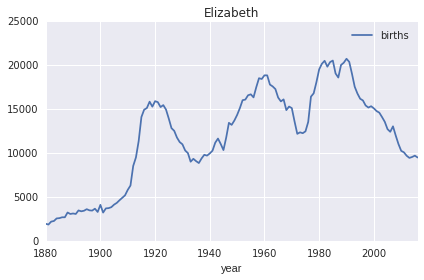

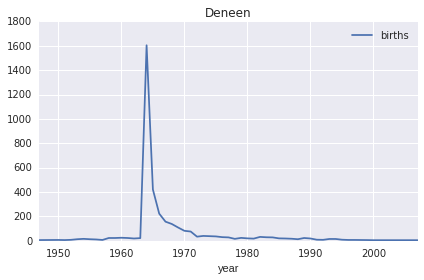

In [79]:
# Set up matplotlib for plotting in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt


#Testing#
#dr=pd.DataFrame() #Setting up an empty Dataframe to fill it up later.
#dr=bnames2.loc[(bnames2['name']=='Elizabeth') & (bnames2['sex']=='F')]
#print(dr.head())


def plot_trends(name, sex):
    t=bnames2.loc[(bnames2['name']==name) & (bnames2['sex']==sex)]
    t.plot(x='year', y='births',title=name)
    return;

# Plot trends for Elizabeth and Deneen 
plt.figure()
plot_trends('Elizabeth','F')
plt.figure()
plot_trends('Deneen','F')
plt.show()
    
# How many times did these female names peak?
num_peaks_elizabeth = 3
num_peaks_deneen    = 1

## 5. Trendy vs. Stable Names
<p>Based on the plots we created earlier, we can see that <strong>Elizabeth</strong> is a fairly stable name, while <strong>Deneen</strong> is not. An interesting question to ask would be what are the top 5 stable and top 5 trendiest names. A stable name is one whose proportion across years does not vary drastically, while a trendy name is one whose popularity peaks for a short period and then dies down. </p>
<p>There are many ways to measure trendiness. A simple measure would be to look at the maximum proportion of births for a name, normalized by the sume of proportion of births across years. For example, if the name <code>Joe</code> had the proportions <code>0.1, 0.2, 0.1, 0.1</code>, then the trendiness measure would be <code>0.2/(0.1 + 0.2 + 0.1 + 0.1)</code> which equals <code>0.5</code>.</p>
<p>Let us use this idea to figure out the top 10 trendy names in this data set, with at least a 1000 births.</p>

In [81]:
# top10_trendy_names | A Data Frame of the top 10 most trendy names

#Creating the max & total column:


maxi=bnames.groupby(['name','sex'])[['births']].agg('max').reset_index()
print("The max column table is : \n", maxi.head())
print("\n")
total=bnames.groupby(['name','sex'])[['births']].agg('sum').reset_index()
print("The total column table is : \n", total.head())
print("\n")
trend=pd.merge(left=maxi, right=total, on=['name','sex'], how='left',suffixes=('_max','_total'))
print(trend.head())

trend['trendiness']= trend['births_max']/trend['births_total']
print(trend.head())

top10_trendy_names=trend.copy()
top10_trendy_names=top10_trendy_names[top10_trendy_names['births_total']>1000]
top10_trendy_names=top10_trendy_names.sort_values(by=['trendiness'], ascending=False).head(10)
top10_trendy_names.rename(columns={'births_total' : 'total', 'births_max' : 'max'}, inplace=True)
print(top10_trendy_names)

The max column table is : 
         name sex  births
0      Aaban   M      16
1      Aabha   F       9
2      Aabid   M       5
3      Aabir   M       5
4  Aabriella   F      11


The total column table is : 
         name sex  births
0      Aaban   M      96
1      Aabha   F      35
2      Aabid   M      10
3      Aabir   M       5
4  Aabriella   F      26


        name sex  births_max  births_total
0      Aaban   M          16            96
1      Aabha   F           9            35
2      Aabid   M           5            10
3      Aabir   M           5             5
4  Aabriella   F          11            26
        name sex  births_max  births_total  trendiness
0      Aaban   M          16            96    0.166667
1      Aabha   F           9            35    0.257143
2      Aabid   M           5            10    0.500000
3      Aabir   M           5             5    1.000000
4  Aabriella   F          11            26    0.423077
           name sex   max  total  trendiness
19116

## 6. Bring in Mortality Data
<p>So, what more is in a name? Well, with some further work, it is possible to predict the age of a person based on the name (Whoa! Really????). For this, we will need actuarial data that can tell us the chances that someone is still alive, based on when they were born. Fortunately, the <a href="https://www.ssa.gov/">SSA</a> provides detailed <a href="https://www.ssa.gov/oact/STATS/table4c6.html">actuarial life tables</a> by birth cohorts.</p>
<table>
<thead>
<tr>
<th style="text-align:right;">year</th>
<th style="text-align:right;">age</th>
<th style="text-align:right;">qx</th>
<th style="text-align:right;">lx</th>
<th style="text-align:right;">dx</th>
<th style="text-align:right;">Lx</th>
<th style="text-align:right;">Tx</th>
<th style="text-align:right;">ex</th>
<th style="text-align:left;">sex</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">39</td>
<td style="text-align:right;">0.00283</td>
<td style="text-align:right;">78275</td>
<td style="text-align:right;">222</td>
<td style="text-align:right;">78164</td>
<td style="text-align:right;">3129636</td>
<td style="text-align:right;">39.98</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">40</td>
<td style="text-align:right;">0.00297</td>
<td style="text-align:right;">78053</td>
<td style="text-align:right;">232</td>
<td style="text-align:right;">77937</td>
<td style="text-align:right;">3051472</td>
<td style="text-align:right;">39.09</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">41</td>
<td style="text-align:right;">0.00318</td>
<td style="text-align:right;">77821</td>
<td style="text-align:right;">248</td>
<td style="text-align:right;">77697</td>
<td style="text-align:right;">2973535</td>
<td style="text-align:right;">38.21</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">42</td>
<td style="text-align:right;">0.00332</td>
<td style="text-align:right;">77573</td>
<td style="text-align:right;">257</td>
<td style="text-align:right;">77444</td>
<td style="text-align:right;">2895838</td>
<td style="text-align:right;">37.33</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">43</td>
<td style="text-align:right;">0.00346</td>
<td style="text-align:right;">77316</td>
<td style="text-align:right;">268</td>
<td style="text-align:right;">77182</td>
<td style="text-align:right;">2818394</td>
<td style="text-align:right;">36.45</td>
<td style="text-align:left;">F</td>
</tr>
<tr>
<td style="text-align:right;">1910</td>
<td style="text-align:right;">44</td>
<td style="text-align:right;">0.00351</td>
<td style="text-align:right;">77048</td>
<td style="text-align:right;">270</td>
<td style="text-align:right;">76913</td>
<td style="text-align:right;">2741212</td>
<td style="text-align:right;">35.58</td>
<td style="text-align:left;">F</td>
</tr>
</tbody>
</table>
<p>You can read the <a href="https://www.ssa.gov/oact/NOTES/as120/LifeTables_Body.html">documentation for the lifetables</a> to understand what the different columns mean. The key column of interest to us is <code>lx</code>, which provides the number of people born in a <code>year</code> who live upto a given <code>age</code>. The probability of being alive can be derived as <code>lx</code> by 100,000. </p>
<p>Given that 2016 is the latest year in the baby names dataset, we are interested only in a subset of this data, that will help us answer the question, "What percentage of people born in Year X are still alive in 2016?" </p>
<p>Let us use this data and plot it to get a sense of the mortality distribution!</p>

          year  age       qx      lx   dx     Lx     Tx    ex sex     V
116 1900-01-01  116  0.83363     0.0    0      0      0  0.69   M  1900
236 1900-01-01  116  0.83363     0.0    0      0      0  0.69   F  1900
346 1910-01-01  106  0.51178     7.0    3      5      9  1.38   M  1910
466 1910-01-01  106  0.47062    61.0   29     47     92  1.52   F  1910
576 1920-01-01   96  0.30765  1625.0  500  1,375  4,000  2.46   M  1920
   year  age       qx        lx      dx      Lx         Tx     ex sex
0  1900    0  0.14596  100000.0  14,596  90,026  5,151,511  51.52   M
1  1900    1  0.03282   85404.0   2,803  84,003  5,061,484  59.26   M
2  1900    2  0.01634   82601.0   1,350  81,926  4,977,482  60.26   M
3  1900    3  0.01052   81251.0     855  80,824  4,895,556  60.25   M
4  1900    4  0.00875   80397.0     703  80,045  4,814,732  59.89   M
     year  age       qx      lx   dx     Lx     Tx    ex sex
116  1900  116  0.83363     0.0    0      0      0  0.69   M
236  1900  116  0.83363   

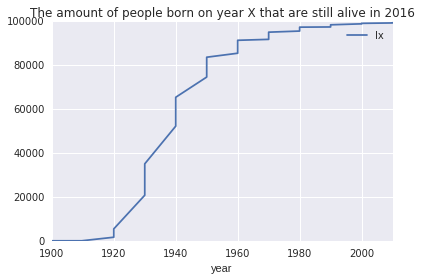

In [83]:
# Read lifetables from datasets/lifetables.csv
lifetables= pd.read_csv('datasets/lifetables.csv')
YearD= pd.read_csv('datasets/lifetables.csv', parse_dates=True, index_col='year') #YearD is a duplicate of lifetables_2016 for exc 7
YearD=YearD.reset_index()
YearD['V']=YearD['year'].dt.year
YearD= YearD[YearD['V']+YearD['age']==2016]
print(YearD.head())
print(lifetables.head())
# Extract subset relevant to those alive in 2016
lifetables_2016= lifetables[lifetables['year']+lifetables['age']==2016]
#lifetables_2016= lifetables[lifetables.index().year+lifetables['age']==2016]
print(lifetables_2016.head())
# Plot the mortality distribution: year vs. lx
lifetables_2016.plot(x='year', y='lx', title='The amount of people born on year X that are still alive in 2016')
plt.show()


## 7. Smoothen the Curve!
<p>We are almost there. There is just one small glitch. The cohort life tables are provided only for every decade. In order to figure out the distribution of people alive, we need the probabilities for every year. One way to fill up the gaps in the data is to use some kind of interpolation. Let us keep things simple and use linear interpolation to fill out the gaps in values of <code>lx</code>, between the years <code>1900</code> and <code>2016</code>.</p>

In [85]:
# Create smoothened lifetable_2016_s by interpolating values of lx
import numpy as np
year=np.arange(1900,2016)
mf = {"M": pd.DataFrame(lifetables), "F": pd.DataFrame(lifetables)}
for sex in ["M", "F"]:
    d = lifetables_2016[lifetables_2016["sex"] == sex][["year", "lx"]]
    mf[sex] = d.set_index("year").\
        reindex(year).\
        interpolate().\
        reset_index()  
    mf[sex]['sex'] = sex

lifetable_2016_s = pd.concat(mf, ignore_index=True) #By ignoring the index we cancel the dictionary and able to concat females and males.
print(lifetable_2016_s.head())


   year    lx sex
0  1900   0.0   F
1  1901   6.1   F
2  1902  12.2   F
3  1903  18.3   F
4  1904  24.4   F


## 8. Distribution of People Alive by Name
<p>Now that we have all the required data, we need a few helper functions to help us with our analysis. </p>
<p>The first function we will write is <code>get_data</code>,which takes <code>name</code> and <code>sex</code> as inputs and returns a data frame with the distribution of number of births and number of people alive by year.</p>
<p>The second function is <code>plot_name</code> which accepts the same arguments as <code>get_data</code>, but returns a line plot of the distribution of number of births, overlaid by an area plot of the number alive by year.</p>
<p>Using these functions, we will plot the distribution of births for boys named <strong>Joseph</strong> and girls named <strong>Brittany</strong>.</p>

        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891894 entries, 0 to 1891893
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 57.7+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 3 columns):
year    232 non-null int64
lx      232 non-null float64
sex     232 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ KB
None 

           name sex  births  year   lx  n_alive
52265      Mary   F   16706  1900  0.0      0.0
52266     Helen   F    6343  1900  0.0      0.0
52267      Anna   F    6114  1900  0.0      0.0
52268  Margaret   F    5304  1900  0.0      0.0
52269      Ruth   F    4765  1900  0.0      0.0
           name sex  births  ye

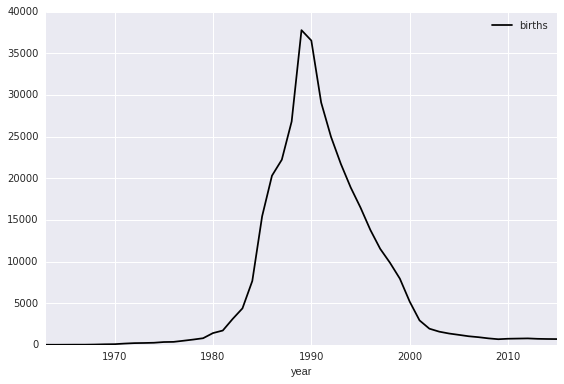

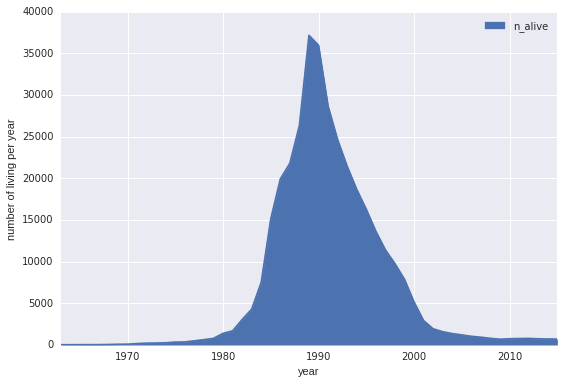

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

print(bnames.head(),"\n")
print(bnames.info(),"\n")
#lifetable_2016_s['year']=lifetable_2016_s['year'].dt.year
print(lifetable_2016_s.info(),"\n")

comb=pd.merge(left=bnames, right=lifetable_2016_s, how='left', on=['year','sex'])
comb=comb.dropna()
comb['n_alive']=comb['births']*comb['lx']/100000
print(comb.head())

def get_data(name,sex):
    """ This function takes name and sex as inputs and returns a DataFrame with Births
        and n_alive by year for each name.
    """
    return comb.loc[(comb['name']== name) & (comb['sex'] == sex)]

print(get_data('Joseph','M'))

def plot_data(name, sex):
    """ This function plots the dist of births overlaid by an area of lx-number of living per year"""
    _ = comb.loc[(comb['name']== name) & (comb['sex'] == sex)].plot(kind='line', x='year', y='births',color='black')
    _ = comb.loc[(comb['name']== name) & (comb['sex'] == sex)].plot(kind='area', x='year', y='n_alive')
    _ = plt.ylabel('number of living per year')
    plt.show()
    return 

plot_data('Brittany','F',)
# Plot the distribution of births and number alive for Joseph and Brittany


## 9. Estimate Age
<p>In this section, we want to figure out the probability that a person with a certain name is alive, as well as the quantiles of their age distribution. In particular, we will estimate the age of a female named <strong>Gertrude</strong>. Any guesses on how old a person with this name is? How about a male named <strong>William</strong>?</p>

             name sex  births  year       lx    n_alive   p_alive
1527038  Gertrude   F      15  2006  99292.4  14.893860  0.012804
1560305  Gertrude   F      18  2007  99321.8  17.877924  0.012808
1595928  Gertrude   F      16  2008  99351.2  15.896192  0.012812
1635970  Gertrude   F       8  2009  99380.6   7.950448  0.012816
1665138  Gertrude   F      17  2010  99410.0  16.899700  0.012819
1699102  Gertrude   F      17  2011  99410.0  16.899700  0.012819
1733015  Gertrude   F      17  2012  99410.0  16.899700  0.012819
1766317  Gertrude   F      18  2013  99410.0  17.893800  0.012819
1799026  Gertrude   F      20  2014  99410.0  19.882000  0.012819
1831125  Gertrude   F      26  2015  99410.0  25.846600  0.012819


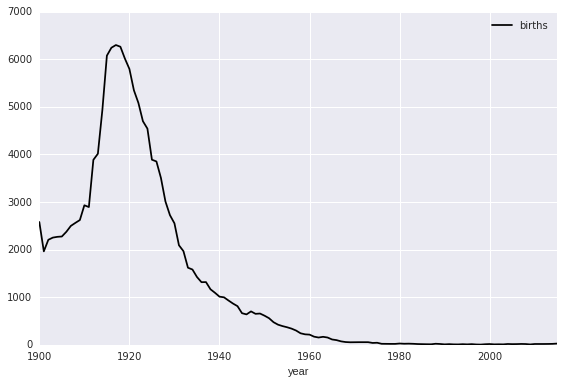

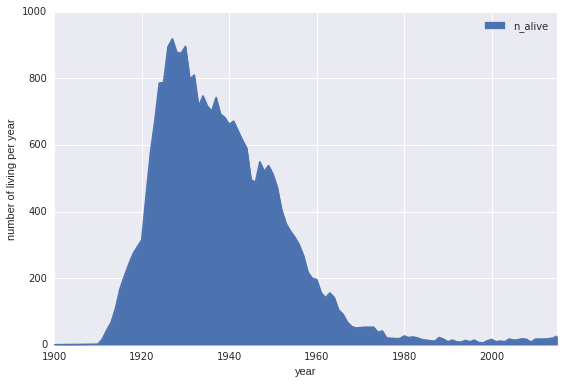

name       Gertrude
p_alive       0.187
q25              70
q50              80
q75              89
sex               F
dtype: object


In [89]:
# Import modules
from wquantiles import quantile
gert=get_data("Gertrude","F")
gert["p_alive"] = gert["lx"]/gert["lx"].sum()
print(gert.tail(10))
plot_data('Gertrude','F',)
# Function to estimate age quantiles
def estimate_age(name, sex):
    temp=get_data(name, sex)
    qs=[0.75, 0.5, 0.25] #Since year starts from a low value-age starts from high value and we need to inverse the order
    q=[2016-int(quantile(temp["year"],temp["n_alive"],q)) for q in qs] #we need to mention in the function q parameter that says which quantiles we want
    series= dict(zip(['q25', 'q50', 'q75'], q)) #Creates a dictionary out of the combined zip object
    series['p_alive'] = round(temp['n_alive'].sum()/temp['births'].sum(),3)
    series['sex']= sex
    series['name']= name
    return pd.Series(series)

print(estimate_age("Gertrude","F"))
# Estimate the age of Gertrude


## 10. Median Age of Top 10 Female Names
<p>In the previous section, we estimated the age of a female named Gertrude. Let's go one step further this time, and compute the 25th, 50th and 75th percentiles of age, and the probability of being alive for the top 10 most common female names of all time. This should give us some interesting insights on how these names stack up in terms of median ages!</p>

In [91]:
# Create median_ages: DataFrame with Top 10 Female names, 
#    age percentiles and probability of being alive
# -- YOUR CODE HERE --

top_f= bnames.groupby(['sex','name']) \
    .sum().sort_values(by=['births'],ascending=False)\
    .sortlevel(level= ['sex'], ascending=[True])\
    .reset_index()\
    .filter(items=['name']).head(10)
     
print(top_f)
median_ages=top_f
d={}

for i,n in enumerate(median_ages["name"]):
    d[i]= estimate_age(n,"F")

print(d)
median_ages=np.transpose(pd.DataFrame(d))
print(median_ages)

        name
0       Mary
1  Elizabeth
2   Patricia
3   Jennifer
4      Linda
5    Barbara
6   Margaret
7      Susan
8    Dorothy
9      Sarah
{0: name        Mary
p_alive    0.544
q25           53
q50           64
q75           74
sex            F
dtype: object, 1: name       Elizabeth
p_alive        0.745
q25               23
q50               38
q75               58
sex                F
dtype: object, 2: name       Patricia
p_alive       0.768
q25              54
q50              63
q75              71
sex               F
dtype: object, 3: name       Jennifer
p_alive       0.964
q25              31
q50              38
q75              44
sex               F
dtype: object, 4: name       Linda
p_alive    0.834
q25           57
q50           64
q75           69
sex            F
dtype: object, 5: name       Barbara
p_alive      0.706
q25             58
q50             66
q75             74
sex              F
dtype: object, 6: name       Margaret
p_alive       0.495
q25              51
q